In [1]:
import math
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten,Dropout
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [2]:
import tensorflow as tf

# New Section

In [3]:
import matplotlib.pyplot as plt


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('cleaned_wind_data')

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.rename(columns = {'0': 'Bearing_3'}, inplace = True)

In [ ]:
plt.plot(data.Bearing_3)

In [ ]:
data=pd.DataFrame(data.Bearing_3)

In [ ]:
print(data)

In [ ]:
scaler=MinMaxScaler(feature_range=(-1,1))

In [ ]:
model_testing=scaler.fit_transform(data)
len(model_testing)

In [ ]:
plt.plot(model_testing)

In [ ]:
def seq(dataset,seq_size=5):
    x=[]
    y=[]
    for i in range(len(dataset)-seq_size-1):
        window=dataset[i:i+seq_size,0]
        x.append(window)
        y.append(dataset[i+seq_size,0])
    return np.array(x) , np.array(y)
seq_size=5
x_test,y_test=seq(model_testing,seq_size)

In [ ]:
x_test

In [6]:
x_test.shape

NameError: name 'x_test' is not defined

In [19]:
n_features=1
x_test= x_test.reshape((x_test.shape[0], x_test.shape[1], n_features))

In [20]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/FYP DATA/MyLSTM_Model.h5')

In [21]:
test_predict=model.predict(x_test)

In [22]:
test_predict1=scaler.inverse_transform(test_predict)
y_test1=scaler.inverse_transform([y_test])

In [ ]:
plt.plot(test_predict1)
plt.plot(y_test1)

In [ ]:
plt.plot(test_predict1)
plt.plot(y_test)

In [ ]:
predited=pd.read_csv('/content/wind_cleaned_data_test_predicted.csv')

In [ ]:
print(predited)

                 0
0         0.178883
1         0.178883
2         0.178883
3         0.178883
4         0.178883
...            ...
48736439 -0.187827
48736440 -0.187828
48736441 -0.187828
48736442 -0.187828
48736443 -0.187828

[48736444 rows x 1 columns]


In [ ]:
print(y_test)

[-0.99999979 -0.99999975 -0.99999971 ...  0.99999988  0.99999992
  0.99999996]


In [ ]:
test_predict1=scaler.inverse_transform(predited)

ValueError: ignored

In [ ]:
data1=pd.to_numeric(data.bearing_1)

""


In [ ]:
data['bearing_1'].dtype

dtype('O')

In [ ]:
print(data.bearing_1)

0           -0.049
1           -0.042
2            0.015
3           -0.051
4           -0.107
             ...  
20152318    -0.002
20152319    -0.002
20152320    -0.002
20152321    -0.002
20152322         
Name: bearing_1, Length: 20152323, dtype: object


In [ ]:
bearing_1_data=data['bearing_3']

In [ ]:
data.bearing_3=pd.to_numeric(bearing_1_data,errors='coerce')

In [ ]:
data.bearing_2=pd.to_numeric(bearing_2_data,errors='coerce')

NameError: ignored

In [ ]:
data.bearing_3=pd.to_numeric(bearing_3_data,errors='coerce')

NameError: ignored

In [ ]:
data.bearing_4=pd.to_numeric(bearing_4_data,errors='coerce')

NameError: ignored

In [ ]:
bearing_3_data=data['bearing_3']

In [ ]:
bearing_4_data=data['bearing_4']

In [ ]:
bearing_4_data=pd.to_numeric(bearing_4_data,errors='coerce')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


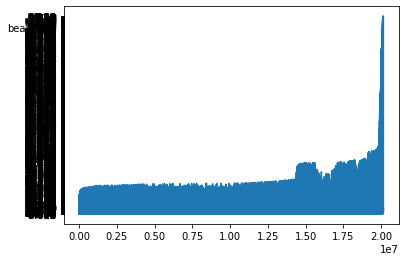

In [ ]:
import matplotlib.pyplot as plt
plt.plot(bearing_1_data.index,bearing_1_data.values)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(bearing_2_data.index,bearing_2_data.values)

NameError: ignored

TypeError: ignored

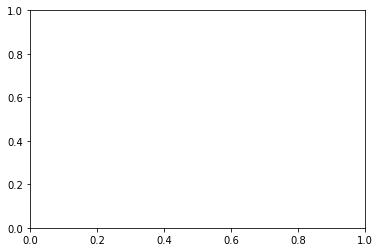

In [ ]:
plt.plot(bearing_1_data.index,bearing_3_data.values)

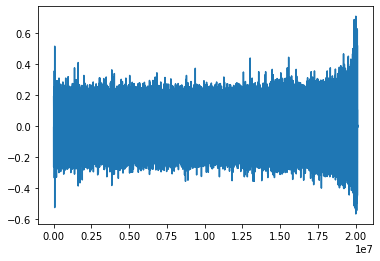

In [ ]:
plt.plot(bearing_1_data.index,bearing_4_data.values)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


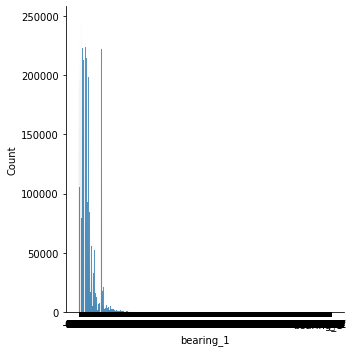

In [ ]:
import seaborn as sns
sns.displot(bearing_1_data)

In [ ]:
sns.displot(bearing_2_data)

NameError: ignored

ConversionError: ignored

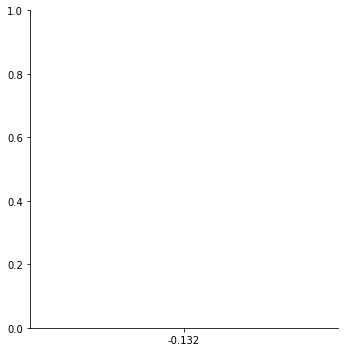

In [ ]:
sns.displot(bearing_3_data)

In [ ]:
sns.displot(bearing_4_data)

In [ ]:
test_size=int(len(bearing_1_data)*0.3)
test_size

In [ ]:
test_data=bearing_1_data[0:test_size]


In [ ]:
plt.plot(test_data.index,test_data.values)

In [ ]:
train_data=bearing_1_data[10152323:]
train_data=train_data.reset_index(drop=True)
train_data

In [ ]:
len(train_data)/3

In [ ]:
train_data.isnull().sum()

In [ ]:
train_data=train_data.dropna()

In [ ]:
train_data.isnull().sum()

In [ ]:
train_data=np.array(train_data)
train_data


In [ ]:
def dataReducing(data,step):
    new_data=[]
    for i in range(0,int(len(data)-step),step):
        new_data.append(data[i])
    return np.array(new_data)

In [ ]:
train_data1=dataReducing(train_data,3)

In [ ]:
len(train_data)

In [ ]:
test_data=dataReducing(test_data,3)
test_data=pd.DataFrame(test_data)
test_data

In [ ]:
train_data1=pd.DataFrame(train_data1)
train_data1

In [ ]:
scaler=MinMaxScaler(feature_range=(-1,1))

In [ ]:
training_scaled_data=scaler.fit_transform(train_data1)
len(training_scaled_data)

NameError: ignored

In [ ]:
testing_scaled_data=scaler.fit_transform(test_data)
len(testing_scaled_data)

NameError: ignored

In [ ]:
training_scaled_data

NameError: ignored

In [ ]:
testing_scaled_data

NameError: ignored

In [ ]:
def seq(dataset,seq_size=5):
    x=[]
    y=[]
    for i in range(len(dataset)-seq_size-1):
        window=dataset[i:i+seq_size,0]
        x.append(window)
        y.append(dataset[i+seq_size,0])
    return np.array(x) , np.array(y)

In [ ]:
seq_size=5
x_train,y_train=seq(training_scaled_data,seq_size)
x_test,y_test=seq(testing_scaled_data,seq_size)

NameError: ignored

In [ ]:
n_features=1
x_train= x_train.reshape((x_train.shape[0], x_train.shape[1], n_features))
x_test= x_test.reshape((x_test.shape[0], x_test.shape[1], n_features))

NameError: ignored

In [ ]:
#model = Sequential()
#model.add(LSTM(128, return_sequences=True, input_shape=(seq_size, n_features)))
#model.add(Dropout(rate=0.02))
#model.add(LSTM(64))
#model.add(Dense(1))
#model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
#model.summary()

In [ ]:
#EPOCHS = 50
#checkpoint_filepath = 'newcheckpoint'
#model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#    filepath=checkpoint_filepath,
#    save_weights_only=True,
#    monitor='val_accuracy',
#    mode='max',
#    save_best_only=True)

In [ ]:
# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
#history=model.fit(x_train, y_train, validation_data=(x_test, y_test),verbose=1,  batch_size=50, shuffle=False,epochs=EPOCHS, callbacks=[model_checkpoint_callback])



In [ ]:
# The model weights (that are considered the best) are loaded into the model.
#model.load_weights(checkpoint_filepath)

In [ ]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/FYP DATA/MyLSTM_Model.h5')

In [ ]:
#from matplotlib import pyplot
#pyplot.plot(history.history['loss'])
#pyplot.title('model train vs validation loss')
#pyplot.ylabel('loss')
#pyplot.xlabel('epoch')
#pyplot.legend(['train', 'validation'], loc='upper right')
#pyplot.show()

In [ ]:
train_predict=model.predict(x_train)

NameError: ignored

In [ ]:
y_train=pd.DataFrame(y_train)

NameError: ignored

In [ ]:
train_predict

NameError: ignored

In [ ]:
print(len(y_train))

NameError: ignored

In [ ]:
print(train_predict)

NameError: ignored

In [ ]:
X_train=scaler.inverse_transform(y_train)
train_predict=scaler.inverse_transform(train_predict)

NameError: ignored

In [ ]:
print(X_train)

NameError: ignored

In [ ]:
print(train_predict)

NameError: ignored

In [ ]:
plt.plot(X_train)
plt.plot(train_predict)

NameError: ignored

In [ ]:
test_score=math.sqrt(mean_squared_error(X_train,train_predict))
test_score

NameError: ignored